<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Project - Review Identification
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Thinking About Alogorithms**
* There is a significant use of classification based algorithms to solve problems like Sentiment Analysis and Chatbot Creation. The example that we will cover today belongs from the domain of Natural Language Processing and it will use classification based algorithms to make sense out of the textual data.

## Lets Start

Import Required Libraries

In [1]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Lets perform the NLP (Natural Language Proccessting)
import re
import nltk
# nltk.download("stopwords") # If you already have that in system no need to download
# What that stopwords dose
#stopwords is a module in nltk that contains all the unwanted words like he, she, it, when, was, where, the, a, an etc

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

# For Spliting The Data
from sklearn.model_selection import train_test_split

# Model Evaluataion 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import auc, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve

# Fifure Size
plt.rcParams["figure.figsize"] = [15,8]

In [2]:
# Load the Dataset
# pd.read_csv helps to load the datast from your computer disc
dataset = pd.read_csv("C:/Users/abc/Desktop/Restaurant_Reviews.tsv",sep="\t")
# as we mentiond we have to work on Natural Languge meanse here we have to deals with charecters
# Charaectors like names, emogies etc.

In [3]:
# Understand what actully data Contains
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# As we see there we have reviews and liked
# Liked citains 1--> Like,0-->Not Like
# As we see here in Review column we have Scentences, so we have to deals with cherectors

By inspecting the data, we understand that it is a typical binary classification problem wherein we have to predict sentiments associated with a particular review.

The only problem is that the input data (feature matrix) is not continuous or categorical in nature. It is actually textual. In order to preprocess the data so that a machine learning algorithm can make sense out of it, we need to apply certain NLP techniques.

**The general steps to preprocess textual data**
* 1. Remove all the numbers, punctuations, emojis and unwanted characters.
* 2. Getting all the data into a similar case (lower case).
* 3. Remove all the unwanted words like preprositions, conjunctions, determiners, pronouns and fillers etc.
* 4. Perform stemming or lemmatization.
* 5. Select an nlp model to represent the data (Bag or Words, TF-IDF Word Vector etc).



In [5]:
# Check the first Review
dataset["Review"][0]

'Wow... Loved this place.'

## Data Preproccesing

In [6]:
ps = PorterStemmer()
clean_reviews = []

for i in range(dataset.shape[0]):
    temp = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    temp = temp.lower()
    temp = temp.split()
    temp = [ps.stem(word) for word in temp if not word in stopwords.words('english')]
    temp = ' '.join(temp)
    clean_reviews.append(temp)

In [7]:
# For the BOW Model we will use CountVectorizer class from sklearn    
cv =  CountVectorizer()
X = cv.fit_transform(clean_reviews)
X = X.toarray()
y = dataset['Liked'].values

In [8]:
# Check How our feachers are formed
print(cv.get_feature_names())

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 

# Built a Classification Model

## Train Test Split

In [9]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (750, 1565)
y_train (750,)
X_test (250, 1565)
y_test (250,)


## Fit the Logistic Regression

In [10]:
# Logistic Regression Full Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## Mode Performance

In [11]:
# Cross Validation
cross_val_score(log_reg, X_train, y_train, cv = 5)

array([0.72      , 0.82      , 0.74      , 0.83333333, 0.76      ])

In [12]:
y_pred_log = cross_val_predict(log_reg, X_test, y_test, cv = 5)

## Model Evaluation

In [13]:
# Accuracy
print("Logistic Regression : ",accuracy_score(y_test, y_pred_log))

Logistic Regression :  0.668


In [14]:
# Confusion Metrix
confusion_matrix(y_test, y_pred_log)

array([[99, 35],
       [48, 68]], dtype=int64)

In [15]:
y_log_scores = cross_val_predict(log_reg, X_test, y_test, cv = 5, method = 'decision_function')
print("The ROC AUC Score for Logistic Regression :", roc_auc_score(y_test, y_log_scores))
fpr, tpr, threshold = roc_curve(y_test, y_log_scores)

The ROC AUC Score for Logistic Regression : 0.6936116829644879


Text(0.5, 1.0, 'ROC Curve')

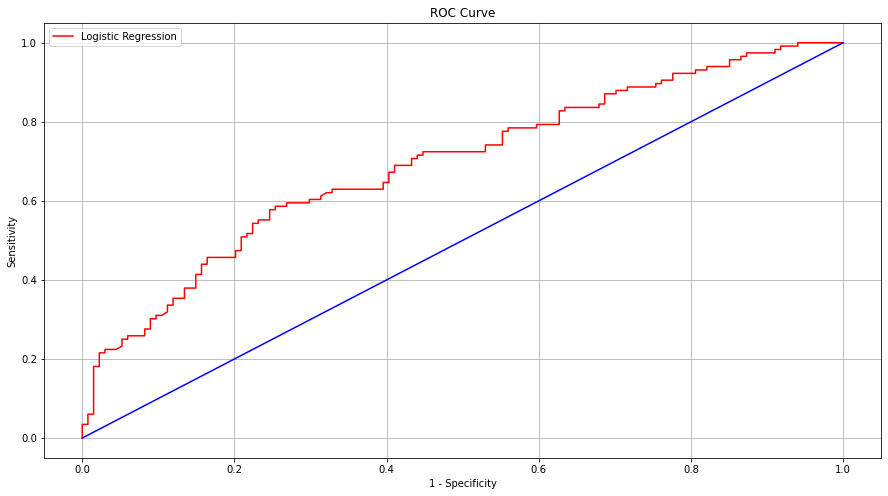

In [16]:
plt.plot(fpr, tpr, c = "r", label = "Logistic Regression")
plt.plot([0, 1], [0, 1], c = "b")
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.legend()
plt.grid(True)
plt.title('ROC Curve')

In [17]:
print("Logistic Regression AUC :", auc(fpr, tpr))

Logistic Regression AUC : 0.6936116829644879


In [18]:
# Built a Restaurant Review Classification System

def run():
    print("Please tell us your feedback!")
    str = input()
    for i in range(dataset.shape[0]):
        temp = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
        temp = temp.lower()
        temp = temp.split()
        temp = [ps.stem(word) for word in temp if not word in stopwords.words('english')]
        temp = ' '.join(temp)
        clean_reviews.append(temp)
    str = [str] # Changing to list so that Count Vectorizer can word
    X_str = cv.transform(str) # CV changing your data into sparse matrix
    X_str = X_str.toarray() # Converting to array
    y_str = log_reg.predict(X_str) # Getting prediction
    y_str = y_str[0] # Extracting first element from the list
    
    if y_str == 1:
        print("\n Yayy! Positive Review")
    else:
        print("\n Negative Review! Our Apologies!")

In [19]:
run()

Please tell us your feedback!
wow its a good food

 Yayy! Positive Review


# My Belive

Project != Product

**Target**
product is placed at Django or Flask

## "END" New learning Begins lets explore other model ad see what are there Responces